<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [2]:
# Write your code here
!pip install tomotopy



     |████████████████████████████████| 16.3 MB 468 kB/s 


In [3]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 4.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=13c013c26e7fd74565f3d9e60888a03f8447cf6f083620afc5201269e69f80de
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [4]:
import pyLDAvis.gensim_models as gensim

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/usr/local/lib/python3.7/dist-packa

In [5]:
#Importing necessary libraries

import json
import zipfile
import glob
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
words = stopwords.words('english')
from textblob import Word
from textblob import TextBlob
nltk.download('punkt')
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy
import os
import logging
import nltk
import numpy as np
import matplotlib.pyplot as plt
import tomotopy as tp
import numpy as np
import pyLDAvis
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import re
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim  
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]
/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from .mio5_utils import VarReader5


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


ModuleNotFoundError: ignored

In [6]:
import csv

In [7]:
import requests
import csv
from bs4 import BeautifulSoup
l1=[i*10 for i in range(1,11)]
l2=[]
for i in l1:
  URL = 'https://citeseerx.ist.psu.edu/search?q=natural+language+processing&t=doc&sort=rlv&start={}'.format(i)
  page = requests.get(URL)
  soup = BeautifulSoup(page.content, 'html.parser')
  for i in soup.find_all("div",{"class":"snippet"}):
    l2.append(i.text)
import pandas as pd
df=pd.DataFrame({"Abstract":l2})
df.to_csv("my1csv.csv")
df

,Abstract
0,"""... Introduction Statistical natural languag..."
1,"""... The paper summarizes the essential proper..."
2,"""... ABSTRACT: Language is way of communicatin..."
3,"""... We report experiments on the use of stand..."
4,"""... this paper, we will describe a simple rul..."
...,...
95,"""... 9. Bibliography ..."""
96,"""... Applying Natural Language Processing tech..."
97,"""... Examples of natural languages are Chinese..."
98,"""... A number of powerful modelling techniques..."


In [8]:
# Data cleaning

#lower
df['Abstract']=df['Abstract'].map(lambda x: x.lower())
#removing punctutations
df['Abstract']=df['Abstract'].map(lambda x: re.sub('[?|!|\'|"|#]', '', x))
#Lemmitizing
df['Abstract']=df['Abstract'].apply(lambda x:" ".join(x for x in x.split() if x not in words))
df['Abstract']=df['Abstract'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head(10)

,Abstract
0,... introduction statistical natural language ...
1,... paper summarizes essential property docume...
2,... abstract: language way communicating word ...
3,... report experiment use standard natural lan...
4,"... paper, describe simple rule-based approach..."
5,... paper focus connectionist model natural la...
6,... abstract: article explores possibility con...
7,... paper (see [schank 86] theoretical discuss...
8,... objective provide overview tutorial natura...
9,... paper briefly describes current implementa...


In [9]:
#Topic Modelling using Supervised LDA algorithm
# I am going to identify the top 20 topics (with 15 words for each topic) in the given dataset


modelSLDA = tp.SLDAModel(k=10) 
for i in df['Abstract']:
    modelSLDA.add_doc(i.split())
for i in range(0, 100, 10):
    modelSLDA.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, modelSLDA.ll_per_word))
for k in range(modelSLDA.k):
    print('Top 10 words of topic #{}'.format(k))
    print(modelSLDA.get_topic_words(k, top_n=10))

modelSLDA.summary()

Iteration: 0	Log-likelihood: -8.247667300526667
Iteration: 10	Log-likelihood: -8.228915766353094
Iteration: 20	Log-likelihood: -8.165187267504066
Iteration: 30	Log-likelihood: -8.1151031865031
Iteration: 40	Log-likelihood: -8.116315724823293
Iteration: 50	Log-likelihood: -8.101505047400023
Iteration: 60	Log-likelihood: -8.064437350028347
Iteration: 70	Log-likelihood: -8.065238123158395
Iteration: 80	Log-likelihood: -8.075291884709385
Iteration: 90	Log-likelihood: -8.042090809314594
Top 10 words of topic #0
[('...', 0.16474513709545135), ('paper', 0.047720182687044144), ('several', 0.030383149161934853), ('abstract:', 0.026048891246318817), ('developed', 0.02171463333070278), ('basic', 0.017380375415086746), ('86]', 0.013046116568148136), ('brief', 0.013046116568148136), ('need', 0.013046116568148136), ('go', 0.0087118586525321)]
Top 10 words of topic #1
[('...', 0.13301566243171692), ('retrieval', 0.036975473165512085), ('document', 0.036975473165512085), ('used', 0.03328162059187889),

In [25]:
topic_term_dists = np.stack([modelSLDA.get_topic_word_dist(k) for k in range(modelSLDA.k)])
doc_topic_dists = np.stack([doc.get_topic_dist() for doc in modelSLDA.docs])
doc_lengths = np.array([len(doc.words) for doc in modelSLDA.docs])
vocab = list(modelSLDA.used_vocabs)
term_frequency = modelSLDA.used_vocab_freq

prepared_data = pyLDAvis.prepare(
    topic_term_dists, 
    doc_topic_dists, 
    doc_lengths, 
    vocab, 
    term_frequency
)
pyLDAvis.save_html(prepared_data, 'ldavis.html')

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [26]:
pyLDAvis.display(prepared_data)

LDA


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

Sentimental Analysis, which is likewise called assessment mining, audit mining (examination extraction), or demeanor investigation, is the undertaking of identifying, separating, and arranging suppositions, opinions, and mentalities concerning various subjects. In an AI approach, feeling investigation can be considered as an administered arrangement task.  We have different component choice procedures, for example, Mutual Information ,Information Gain, Chi-square,Tf-idf,  lexicon, word vectors and some more.

Shared Information: MIterm chooses highlights that are not consistently conveyed among the feeling classes since they are enlightening of their classes.

Chi-square :Chi-square estimates how much expected counts and noticed counts veer off from one another.

Data Gain: Information gainis the most regularly involved highlight choice technique in the field of AI. It works out the importance of a component for expectation of feeling of survey by investigating the presence or nonattendance of an element in a record.

TF-Idf: It is a weighting plan, which estimates how pertinent a word to an example in the dataset.The significance increments when the times a word shows up in the example

Other element extraction strategy is word embeddings (otherwise called word vectors).

Here for this investigation, I have utilized TF-Idf, which is a factual measure that assesses how significant a word is to an archive in an assortment of records. This is finished by duplicating two measurements: how often a word shows up in a report, and the converse record recurrence of the word across a bunch of documents. Machine learning with normal language is confronted with one significant obstacle - its calculations as a rule manage numbers, and regular language is, indeed, text. So we want to change that text into numbers(text vectorization). It's a principal step during the time spent AI for dissecting information, and different vectorization calculations will definitely influence outcome, so we really want to pick one that will convey the outcomes we are expecting.

Whenever we have changed words into numbers, such that's AI calculations can comprehend, the TF-IDF score can be taken care of to calculations, for example, Naive Bayes and Support Vector Machines and so forth, significantly working on the aftereffects of additional essential strategies like word counts.

So this sort of portrayals makes it workable for words with comparative importance to have a comparable portrayal, which can work on the presentation of classifiers.

In [10]:
import json
import zipfile
import glob
import pandas as pd
import json
import zipfile
import glob
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
from textblob import TextBlob
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
import requests
import csv
from bs4 import BeautifulSoup
l1=[i*10 for i in range(1,11)]
l2=[]
for i in l1:
  URL = 'https://citeseerx.ist.psu.edu/search?q=natural+language+processing&t=doc&sort=rlv&start={}'.format(i)
  page = requests.get(URL)
  soup = BeautifulSoup(page.content, 'html.parser')
  for i in soup.find_all("div",{"class":"snippet"}):
    l2.append(i.text)
import pandas as pd
df=pd.DataFrame({"Abstract":l2})
df.to_csv("my1csv.csv")
df

,Abstract
0,"""... Introduction Statistical natural languag..."
1,"""... The paper summarizes the essential proper..."
2,"""... ABSTRACT: Language is way of communicatin..."
3,"""... We report experiments on the use of stand..."
4,"""... this paper, we will describe a simple rul..."
...,...
95,"""... 9. Bibliography ..."""
96,"""... Applying Natural Language Processing tech..."
97,"""... Examples of natural languages are Chinese..."
98,"""... A number of powerful modelling techniques..."


In [14]:
rate = [ ]
text = [ ]
for files in glob.iglob('https://citeseerx.ist.psu.edu/search?q=natural+language+processing&t=doc&sort=rlv&start={}'):
  f=open(files)
  data=json.load(f)
  for i in data:
      rate.append(i['stars'])
      text.append(i['text'])

In [17]:
mydata = pd.DataFrame({'title':text,'text':rate})

In [20]:
mydata['text']=mydata['text'].astype(int)
mydata.head()

,title,text


In [21]:
# Data cleaning

#lower
df['Abstract']=df['Abstract'].map(lambda x: x.lower())
#removing punctutations
df['Abstract']=df['Abstract'].map(lambda x: re.sub('[?|!|\'|"|#]', '', x))
#Lemmitizing
df['Abstract']=df['Abstract'].apply(lambda x:" ".join(x for x in x.split() if x not in words))
df['Abstract']=df['Abstract'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head(10)

,Abstract
0,... introduction statistical natural language ...
1,... paper summarizes essential property docume...
2,... abstract: language way communicating word ...
3,... report experiment use standard natural lan...
4,"... paper, describe simple rule-based approach..."
5,... paper focus connectionist model natural la...
6,... abstract: article explores possibility con...
7,... paper (see [schank 86] theoretical discuss...
8,... objective provide overview tutorial natura...
9,... paper briefly describes current implementa...


In [23]:
#Data Preprocessing

mydata['clean text'] = mydata['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
mydata['clean text'] = mydata['clean text'].str.replace('[^\w\s]','')
mydata['clean text'] = mydata['clean text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
high_freq = pd.Series(' '.join(mydata['clean text']).split()).value_counts()[:10]
high_freq = list(high_freq.index)
mydata['clean text'] = mydata['clean text'].apply(lambda x: " ".join(x for x in x.split() if x not in high_freq))
low_freq = pd.Series(' '.join(mydata['clean text']).split()).value_counts()[-10:]
low_freq = list(low_freq.index)
mydata['clean text'] = mydata['clean text'].apply(lambda x: " ".join(x for x in x.split() if x not in low_freq))

mydata['clean text'] = mydata['Reviews'].str.replace('[^\w\s]','')
mydata['clean text'] = mydata['clean text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
mydata['clean text'] = mydata['clean text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:13: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:13: DeprecationWarning: invalid escape sequence \w
<input>:4: DeprecationWarning: invalid escape sequence \w
<input>:13: DeprecationWarning: invalid escape sequence \w
<ipython-input-23-858d51723902>:4: DeprecationWarning: invalid escape sequence \w
  mydata['clean text'] = mydata['clean text']

AttributeError: ignored

In [24]:
def sentiment(x):
    if x == 5:
        return 'Very positive'
    if x == 4:
        return 'Positive'
    if x == 3:
        return 'Neutral'
    if x == 2:
        return 'Negative'
    if x == 1:
        return 'Very negative'
    
mydata['sentiment'] = mydata['title'].apply(lambda x: sentiment(x))
train, test = sklearn.model_selection.train_test_split(mydata, train_size=0.8, test_size=0.2)

ValueError: ignored

In [ ]:
svc_pipeline = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC())])
svc = svc_pipeline.fit(train['clean text'], train['sentiment'])
test['predicted sentiment'] = svc.predict(test['clean text'])

In [ ]:
print('TFIDF-BASED LINEARSVC SENTIMENT ANALYSIS:', '\n')
print(test[['Reviews', 'sentiment', 'predicted sentiment']].head(10))
svc_recall = recall_score(test['sentiment'], test['predicted sentiment'], average='macro')
svc_precision = precision_score(test['sentiment'], test['predicted sentiment'], average='macro')
svc_accuracy = accuracy_score(test['sentiment'], test['predicted sentiment'])*100
svc_f1 = f1_score(test['sentiment'], test['predicted sentiment'], average='macro')
print('Accuracy of LinearSVC :', svc_accuracy)
print('f1-score of LinearSVC :', svc_f1)
print('Precision score of LinearSVC :', svc_precision)
print('Recall score of LinearSVC :', svc_recall)

In [ ]:
nb_pipeline = Pipeline([('vect', CountVectorizer()),
                        ('tfidf', TfidfTransformer()),
                        ('clf', MultinomialNB())])
nb = nb_pipeline.fit(train['clean text'], train['sentiment'])
test['nb predicted sentiment'] = nb.predict(test['clean text'])





In [ ]:
print('\n', 'MultinomialNB SENTIMENT ANALYSIS:', '\n')
print(test[['Abstract', 'sentiment', 'nb predicted sentiment']].head(10))
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
nb_recall = recall_score(test['sentiment'], test['nb predicted sentiment'], average='macro')
nb_precision = precision_score(test['sentiment'], test['nb predicted sentiment'], average='macro')
nb_accuracy = accuracy_score(test['sentiment'], test['nb predicted sentiment'])*100
nb_f1 = f1_score(test['sentiment'], test['nb predicted sentiment'], average='macro')

print('Accuracy of MultinomialNB:', nb_accuracy)
print('f1-score of MultinomialNB:', nb_f1)
print('Precision score of MultinomialNB:', nb_precision)
print('Recall score of  MultinomialNB:', nb_recall)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbpln = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', GradientBoostingClassifier(n_estimators=15,verbose=2))])
gb = gbpln.fit(train['clean text'], train['sentiment'])
test['GB predicted sentiment'] = gb.predict(test['clean text'])

In [ ]:
print('GRADIENTBOOSTING SENTIMENT ANALYSIS:', '\n')
print(test[['Abstract', 'sentiment', 'GB predicted sentiment']].head(10))

gb_recall = recall_score(test['sentiment'], test['GB predicted sentiment'], average='macro')
gb_precision = precision_score(test['sentiment'], test['GB predicted sentiment'], average='macro')
gb_accuracy = accuracy_score(test['sentiment'], test['GB predicted sentiment'])*100
gb_f1 = f1_score(test['sentiment'], test['GB predicted sentiment'], average='macro')

print('Accuracy of GradientBoosting:', gb_accuracy)
print('f1-score of GradientBoosting:', gb_f1)
print('Precision score of GradientBoosting:', gb_precision)
print('Recall score of GradientBoosting:', gb_recall)


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [27]:
# Write your code here
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout
import matplotlib.pyplot as plt

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")




/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):
/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.divide(0.4, 1, casting="unsafe", dtype=np.float),


In [ ]:
#Loading the Train and Test data

train_data=pd.read_csv("/content/sample_data/train.csv")
test_data=pd.read_csv("")

#I am checking for number of features and datapoints i have in both the files.i.e., train and test data

print("The Number of data points in train data are:{0}\nThe Number of features in train data are:{1}".format(train_data.shape[0],train_data.shape[1]))
print("The Number of data points in test data are:{0}\nThe Number of features in test data are:{1}".format(test_data.shape[0],test_data.shape[1])

In [ ]:
#Loading the Train and Test data

train_data=pd.read_csv("/content/sample_data/train.csv")
test_data=pd.read_csv("")

#I am checking for number of features and datapoints i have in both the files.i.e., train and test data

print("The Number of data points in train data are:{0}\nThe Number of features in train data are:{1}".format(train_data.shape[0],train_data.shape[1]))
print("The Number of data points in test data are:{0}\nThe Number of features in test data are:{1}".format(test_data.shape[0],test_data.shape[1])

In [29]:
#Loading the Train and Test data

train_data=pd.read_csv("/content/sample_data/train.csv")
test_data=pd.read_csv("/content/sample_data/test.csv")

#I am checking for number of features and datapoints i have in both the files.i.e., train and test data

print("The Number of data points in train data are:{0}\nThe Number of features in train data are:{1}".format(train_data.shape[0],train_data.shape[1]))
print("The Number of data points in test data are:{0}\nThe Number of features in test data are:{1}".format(test_data.shape[0],test_data.shape[1]))

The Number of data points in train data are:20800
The Number of features in train data are:5
The Number of data points in test data are:5200
The Number of features in test data are:4


In [30]:
train_data.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [31]:
test_data.head(5)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [32]:
print(train_data.isnull().sum())
train_data = train_data.replace(np.NaN,0)
print(train_data.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64
id        0
title     0
author    0
text      0
label     0
dtype: int64


In [33]:
print(test_data.isnull().sum())
test_data = test_data.replace(np.NaN,0)
print(test_data.isnull().sum())

id          0
title     122
author    503
text        7
dtype: int64
id        0
title     0
author    0
text      0
dtype: int64


In [34]:
column = list(train_data.select_dtypes(['object']).columns)

In [35]:
for i in train_data.columns:
    print("Statistics for feature : {0}".format(i))
    print(train_data[i].describe())
    print("...........................")

Statistics for feature : id
count    20800.000000
mean     10399.500000
std       6004.587135
min          0.000000
25%       5199.750000
50%      10399.500000
75%      15599.250000
max      20799.000000
Name: id, dtype: float64
...........................
Statistics for feature : title
count     20800
unique    19804
top           0
freq        558
Name: title, dtype: int64
...........................
Statistics for feature : author
count     20800
unique     4202
top           0
freq       1957
Name: author, dtype: int64
...........................
Statistics for feature : text
count     20800
unique    20387
top            
freq         75
Name: text, dtype: object
...........................
Statistics for feature : label
count    20800.000000
mean         0.500625
std          0.500012
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: label, dtype: float64
...........................


In [36]:
for i in test_data.columns:
    print("Basic statistics for feature : {0}".format(i))
    print(test_data[i].describe())
    print("...........................")

Basic statistics for feature : id
count     5200.000000
mean     23399.500000
std       1501.255031
min      20800.000000
25%      22099.750000
50%      23399.500000
75%      24699.250000
max      25999.000000
Name: id, dtype: float64
...........................
Basic statistics for feature : title
count     5200
unique    5057
top          0
freq       122
Name: title, dtype: int64
...........................
Basic statistics for feature : author
count     5200
unique    1733
top          0
freq       503
Name: author, dtype: int64
...........................
Basic statistics for feature : text
count     5200
unique    5127
top           
freq        31
Name: text, dtype: object
...........................


In [38]:
#Statistics of output variable
train_data['title'].describe()

count     20800
unique    19804
top           0
freq        558
Name: title, dtype: int64

In [39]:
train_data[column] = train_data[column].apply(lambda x: x.astype('category'))
train_data[column] = train_data[column].apply(lambda x: x.cat.codes)

In [40]:
test_data[column] = test_data[column].apply(lambda x: x.astype('category'))
test_data[column] = test_data[column].apply(lambda x: x.cat.codes)

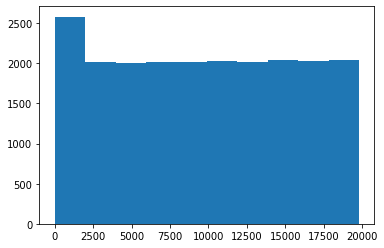

In [42]:
import matplotlib.pyplot as plt
plt.hist(train_data['title'])
plt.show()

In [43]:
print ("Skewness of title:", train_data['title'].skew())

Skewness of title: 0.0018142589276987054


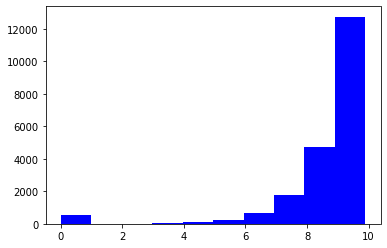

In [44]:
train_data['LT_title'] = np.log(train_data['title']+1)
plt.hist(train_data['LT_title'], color='blue')
plt.show()

In [45]:
print ("Skewness of Log Transformed title:", train_data['LT_title'].skew())

Skewness of Log Transformed title: -3.5147657


In [46]:
#  Finding Correlation 
correlate = train_data.corr(method='pearson')
print(correlate['title'])

id         -0.001376
title       1.000000
author     -0.009773
text        0.142954
label      -0.018515
LT_title    0.697182
Name: title, dtype: float64


In [47]:
train_data.select_dtypes(include=[np.number]).columns.values

array(['id', 'title', 'author', 'text', 'label', 'LT_title'], dtype=object)

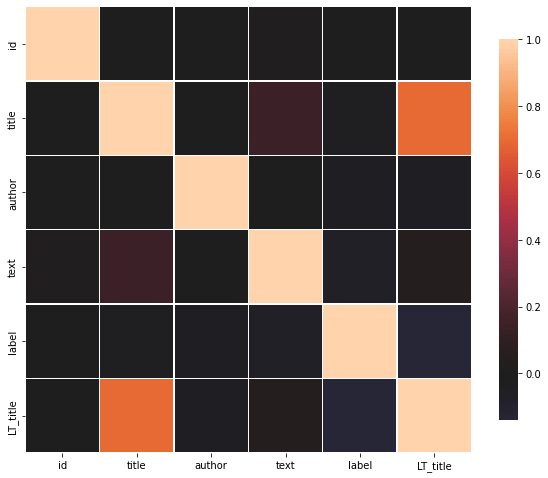

In [48]:
import seaborn as sns
def correlation_heatmap(train_data):
    correlations = train_data.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5,  cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(train_data)

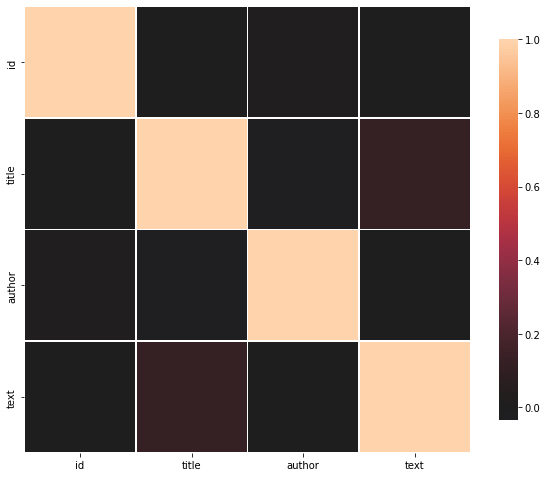

In [49]:
def correlation_heatmap(test_data):
    correlations = test_data.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5,  cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(test_data)

In [52]:
feat_col=['id', 'title','author','text']

In [54]:
# Linear Model for the  train and test
X = train_data[feat_col]
Y = train_data['title']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [56]:
mytest =test_data[feat_col]

In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [58]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test,y_test))

Linear Regression R squared": 1.0000


In [59]:
predicted = regressor.predict(mytest)

In [60]:
print(pd.DataFrame({'Predicted Price':predicted}))

      Predicted Price
0              3671.0
1              3477.0
2                12.0
3              4090.0
4              2287.0
...               ...
5195           3843.0
5196           2242.0
5197            696.0
5198             75.0
5199            428.0

[5200 rows x 1 columns]
